<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/Estadistica/Datos_estadisticos_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIZ ILEANA RODRIGUEZ 

18-02-2023

In [ ]:
# importando modulos necesarios

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy import stats
from scipy.stats import gmean, hmean, trim_mean, uniform, norm
from scipy.stats import shapiro

![alt text](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_HypothesisTest-Means-Proportions/Means-Proportions-Wordle.png)

En esta sección se dará una breve introducción sobre este tema que puede causar muchos dolores de cabeza al estar aprendiendo acerca del manejo de datos.

Se abordan todos esos conceptos y con ejemplos usando Python.

----

* ## ¿Qué es una prueba de hipótesis? 
* ### ¿Porqué debemos usarlas? 
* #### ¿Cuáles son las bases de las hipótesis?
* #### ¿Cuáles son los parámetros importantes de dichas pruebas?

---




----

Empecemos por la primera pregunta...

* ## ¿Qué es una prueba de hipótesis?

Las pruebas de hipótesis son utilizados para la toma de decisiones **estadísticas**, utilizando datos experimentales. En palabras burdas, es el pan de cada día de las estadísticas inferenciales y una habilidad crítica en el repertorio de un científico de datos.

* ## ¿Porqué usamos las pruebas de hipótesis?

La prueba de hipótesis es un procedimiento esencial en estadística. Una prueba de hipótesis evalúa dos afirmaciones mutuamente excluyentes sobre una **población** para determinar qué afirmación es mejor respaldada por los datos de la *muestra*. Cuando decimos que un hallazgo es estadísticamente significativo, es gracias a una prueba de hipótesis.

<font color=red> Las pruebas de hipótesis son una herramienta crítica en **estadística inferencial**, para determinar cuál podría ser el valor de un parámetro de **población**. A menudo sacamos esta conclusión basada en un análisis de datos de muestra....</font>

---
---

* ## ¿Cuales son las bases de las hipótesis? 

   * ### Hipótesis Nula
   * ### Hipótesis Alterna

---

Hipótesis nula (H0): - En la estadística inferencial, la hipótesis nula es una declaración general o suposición predeterminada de que no hay relación entre dos fenómenos medidos, o no hay asociación entre grupos

En otras palabras, es una suposición básica o basada en el dominio o el conocimiento del problema.

Ejemplo: la producción de una empresa es = 50 unidades / por día, etc.

---

Hipótesis alterna (H1): - Es la hipótesis contraria a la hipótesis nula. Por lo general, se considera que las observaciones son el resultado de un efecto real (con cierta cantidad de variación de probabilidad superpuesta)

Ejemplo: la producción de una empresa es ! = 50 unidades / por día, etc.

---
<font color="red">**Por lo tanto, el proceso de prueba de hipótesis consiste en formular preguntas sobre los datos en función de la información recopilada y probarlas utilizando métodos estadísticos.**</font>

---

### A continuación mostramos un pequeño ejemplo utilizando la prueba estadística Shapiro - Wilks
Esta prueba confirma si una muestra presenta una distribución normal(H0) o no (H1). 

Mayor información de la librería pueden consultar el siguiente [artículo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) y el [artículo](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) siguiente para la prueba estadística. 

stat=0.895, p=0.193
Probably Gaussian


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


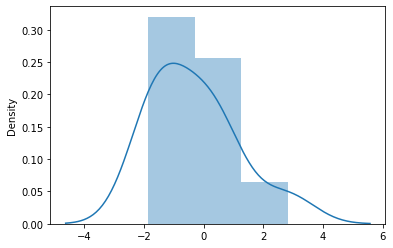

In [ ]:
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))

'''
El valor crítico de shapiro para n = 10 es  cv = 0.842
El estadistico calculado es stat = 0.895
Aquí podemos ver que stat > cv  <- Aceptamos H1 (Rechazamos H0)

Recordemos este planteamiento. 

Nuestros datos no son Gaussianos (H0), 
Nuestos datos son Gaussianos (H1)

Del mismo estadístico tenemos que 
The W statistic needs to be greater than the critical value for the 
null hypothesis that the samples are drawn from a Gaussian distribution not to be rejected
'''


if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    
sns.distplot(data)


#Lo más recomendable es siempre basarnos en el valor del estadístico calculado (stat)
#y tener un conocimiento de los valores críticos

#Recordemos lo siguiente de la tabla de confusión

#FF <- H0    FV <- Error Tipo 1
#VF <- ET2   VV <- H1

#Cuando ustedes tienen conocimiento de los estadísticos y los valores críticos

#lo ideal es realizar esta comparación para las pruebas de hipótesis
# Si STAT <= CV  <- Aceptamos H0 (Rechazamos H1)
# Si STAT >  CV  <- Aceptamos H1 (Rechazamos H0)


#Caso contrario, podríamos utilizar la evaluación del valor p-value  contra el alpha

#Pero al utilizar p-value, las comparaciones pueden ser algo ambigüas, por el simple hecho de
#estar ajustandolo para entender la respuesta de las pruebas de hipótesis.

#Alpha <- Nivel de Significancia o Nivel de Confianza

### Definición de error Tipo I  y  error Tipo II</center></h1>

---

* Error tipo I: cuando rechazamos la hipótesis nula, aunque esa hipótesis era cierta. El error tipo I se denota por alfa. En las pruebas de hipótesis, la curva normal que muestra la región crítica se llama región alfa

* Errores de tipo II: cuando aceptamos la hipótesis nula pero es falsa. Los errores de tipo II se denotan por beta. En las pruebas de hipótesis, la curva normal que muestra la región de aceptación se llama región beta.

![alt text](https://dp8v87cz8a7qa.cloudfront.net/45396/5bd20d03240611540492547.png)

---

* Prueba de una cola: - Una prueba de una hipótesis estadística, donde la región de rechazo está en un solo lado de la distribución de muestreo.

Ejemplo: - una universidad tiene ≥ 4000 estudiantes o ciencia de datos ≤ 80%

* Prueba de dos colas: una prueba de dos colas es una prueba estadística en la que el área crítica de una distribución es de dos lados y prueba si una muestra es mayor o menor que un cierto rango de valores. Si la muestra que se prueba cae en cualquiera de las áreas críticas, se acepta la hipótesis alternativa en lugar de la hipótesis nula.

Ejemplo: una universidad! = 4000 estudiantes o ciencias de datos! = 80%


![img](https://miro.medium.com/max/424/1*frUEBVOzWvCKKfI212MM_Q.png)

---
### Definición de p-value y alpha</center></h1>

---

* Esta posibilidad de observar el estadístico de prueba, es el llamado **valor p (p - value)** y se calcula bajo el supuesto de una cierta distribución de probabilidad (a partir de la cual se genera el estadístico de prueba).

* **Nivel de significancia ($\alpha$)**: se refiere al grado de significancia en el que aceptamos o rechazamos la hipótesis nula. El 100% de precisión no es posible para aceptar o rechazar una hipótesis, por lo que seleccionamos un nivel de 0.05 o 5% (flexible con los datos...), lo que significa que su producción debe tener un 95% de confianza para dar un tipo de resultado similar en cada muestra.

Podemos consultar algo extra en la siguiente [liga](https://blog.minitab.com/en/adventures-in-statistics-2/how-to-correctly-interpret-p-values)

---

#### Ejemplo

Supongamos que estamos haciendo una comparativa del promedio del costo energético que hemos tenido de este año con respecto al anterior.

Queremos determinar si nuestra media (330.6) indica que el costo promedio de energía de este año es significativamente diferente del costo promedio de energía del año pasado de 260.

![img](https://blog.minitab.com/hubfs/Imported_Blog_Media/sampling_dist_null.png)

La gráfica de distribución de probabilidad anterior muestra la distribución de las medias muestrales que obtendríamos bajo el supuesto de que la hipótesis nula es verdadera (media poblacional = 260) y extrajimos repetidamente una gran cantidad de muestras aleatorias.

¿dónde trazamos la línea de significancia estadística en el gráfico? Ahora agregaremos el nivel de significancia (alfa) y el valor P, que son las herramientas de toma de decisiones que necesitaremos.

Usaremos estas herramientas para probar las siguientes hipótesis:

    Hipótesis nula: La media poblacional es igual a la media hipotética (260).
    Hipótesis alternativa: La media poblacional difiere de la media hipotética (260).

#### ¿Qué es el nivel de significancia (alfa)?

El nivel de significancia, también denominado alfa o α, es la probabilidad de rechazar la hipótesis nula cuando es verdadera. Por ejemplo, un nivel de 0,05 indica un riesgo del 5 % de concluir que existe una diferencia cuando no hay una diferencia real.

Este tipo de definiciones pueden ser difíciles de entender debido a su naturaleza técnica. ¡Una imagen hace que los conceptos sean mucho más fáciles de comprender!

El nivel de significancia determina qué tan lejos del valor de la hipótesis nula dibujaremos esa línea en el gráfico. Para graficar un nivel de significancia de 0.05, necesitamos sombrear el 5% de la distribución que está más alejado de la hipótesis nula.

![img](https://blog.minitab.com/hubfs/Imported_Blog_Media/sig_level_05.png)

En el gráfico anterior, las dos áreas sombreadas son equidistantes del valor de la hipótesis nula y cada área tiene una probabilidad de 0.025, para un total de 0.05. En estadística, llamamos a estas áreas sombreadas la región crítica para una prueba de dos colas. 

Si la media de la población es 260, esperaríamos obtener una media muestral que caiga en la región crítica el 5% de las veces. La región crítica define qué tan lejos debe estar nuestro estadístico muestral del valor de la hipótesis nula antes de que podamos decir que es lo suficientemente inusual como para rechazar la hipótesis nula.

Nuestra media muestral (330.6) cae dentro de la región crítica, lo que indica que es estadísticamente significativa en el nivel 0.05.

También podemos ver si es estadísticamente significativo utilizando el otro nivel de significación común de 0.01.

![img](https://blog.minitab.com/hubfs/Imported_Blog_Media/sig_level_01.png)

Las dos áreas sombreadas tienen cada una una probabilidad de 0.005, lo que suma una probabilidad total de 0.01. Esta vez nuestra media muestral no cae dentro de la región crítica y no podemos rechazar la hipótesis nula. Esta comparación muestra por qué necesita elegir su nivel de significancia antes de comenzar su estudio. ¡Lo protege de elegir un nivel de significancia porque convenientemente le brinda resultados significativos!

Gracias al gráfico, pudimos determinar que nuestros resultados son estadísticamente significativos al nivel 0.05 sin usar un valor P.


####  ¿Qué son los valores P?

Los valores P son la probabilidad de obtener un efecto al menos tan extremo como el de los datos de su muestra, asumiendo la verdad de la hipótesis nula.

Esta definición de valores P, aunque técnicamente correcta, es un poco complicada. ¡Es más fácil de entender con un gráfico!

Para graficar el valor P para nuestro conjunto de datos del ejemplo, necesitamos determinar la distancia entre la media de la muestra y el valor de la hipótesis nula (330.6 - 260 = 70.6). A continuación, podemos graficar la probabilidad de obtener una media muestral que sea al menos igual de extrema en ambas colas de la distribución (260 +/- 70.6).


En el gráfico anterior, las dos áreas sombreadas tienen cada una una probabilidad de 0.01556, para una probabilidad total de 0.03112. Esto representa la probabilidad de obtener una media muestral que sea al menos tan extrema como nuestra media muestral en ambas colas de la distribución si la media poblacional es 260. ¡Ese es nuestro valor P!

Cuando un valor P es menor o igual que el nivel de significancia, se rechaza la hipótesis nula. Si tomamos el valor P para nuestro ejemplo y lo comparamos con los niveles comunes, coincide con los resultados gráficos anteriores. El valor P de 0.03112 es estadísticamente significativo a un nivel alfa de 0.05, pero no a un nivel de 0.01.

Si nos ceñimos a un nivel de 0.05, podemos concluir que el coste energético medio de la población es superior a 260.

Un error común es interpretar el valor P como la probabilidad de que la hipótesis nula sea verdadera.

<font color="red">Tenga en cuenta que no existe un nivel de significancia mágico que distinga entre los estudios que tienen un efecto verdadero y los que no lo tienen con un 100 % de precisión. </font>
    
<font color="blue">Los valores alfa comunes de 0.05 y 0.01 se basan simplemente en la tradición. Para un nivel de de 0.05, espere obtener medias muestrales en la región crítica el 5 % de las veces cuando la hipótesis nula sea verdadera. En estos casos, no sabrá que la hipótesis nula es verdadera, pero la rechazará porque la media de la muestra se encuentra en la región crítica. ¡Es por eso que el nivel de significancia también se conoce como tasa de error!</font>



---
---
---
<a id="f"></a>
<h1><center>Referencias y links de interés</center></h1>

[Regreso a contenido](#contenido)

---

* [Información de pruebas estadísticas](https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740)
* Prueba [Shapiro en python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)
* Formula de [Shapiro](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)
* Pruebas de [normalidad](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411)
* Pruebas de [multinormalidad](https://www.statology.org/multivariate-normality-test-python/)
---

* M. Zhoua and Y. Shaob (2014) [A Powerful Test for Multivariate Normality](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3927875/)
* Algunos links de interés para [pruebas de normalidad](https://www.statology.org/python-guides/)

* Valores críticos [Shapiro-Wilk test](https://scistatcalc.blogspot.com/2013/09/critical-value-of-w-statistic.html?m=0)
* Entendimiento de pruebas de hipótesis: [p-value y alpha](https://blog.minitab.com/en/adventures-in-statistics-2/understanding-hypothesis-tests-significance-levels-alpha-and-p-values-in-statistics)
